In [ ]:
import uproot
import awkward as ak # for data manipulation
import numpy as np
import pandas as pd 
import matplotlib as mpl # for plotting
import matplotlib.pyplot as plt # common shorthand
from mpl_toolkits.mplot3d import Axes3D


In [3]:
# Root file location and ldmx-sw pass name
root_file =uproot.open('/Users/mghrear/data/LDMX_GNN/4e_run1.root')['LDMX_Events']
passName="sim" # "TrackerReco"

In [31]:
# Laod in data arrays from root file

# Load Tagger info
Tagger_SimHits_x = root_file['TaggerSimHits_'+passName+'/TaggerSimHits_'+passName+'.x_'].array()
Tagger_SimHits_y = root_file['TaggerSimHits_'+passName+'/TaggerSimHits_'+passName+'.y_'].array()
Tagger_SimHits_z = root_file['TaggerSimHits_'+passName+'/TaggerSimHits_'+passName+'.z_'].array()
Tagger_SimHits_pdgID = root_file['TaggerSimHits_'+passName+'/TaggerSimHits_'+passName+'.pdgID_'].array()
Tagger_SimHits_Edep = root_file['TaggerSimHits_'+passName+'/TaggerSimHits_'+passName+'.edep_'].array()
Tagger_SimHits_trackID = root_file['TaggerSimHits_'+passName+'/TaggerSimHits_'+passName+'.trackID_'].array()

Tagger_Digi_x = root_file['DigiTaggerSimHits_'+passName+'/DigiTaggerSimHits_'+passName+'.x_'].array()
Tagger_Digi_y = root_file['DigiTaggerSimHits_'+passName+'/DigiTaggerSimHits_'+passName+'.y_'].array()
Tagger_Digi_z = root_file['DigiTaggerSimHits_'+passName+'/DigiTaggerSimHits_'+passName+'.z_'].array()
Tagger_Digi_pdgID = root_file['DigiTaggerSimHits_'+passName+'/DigiTaggerSimHits_'+passName+'.pdg_id_'].array()
Tagger_Digi_Edep = root_file['DigiTaggerSimHits_'+passName+'/DigiTaggerSimHits_'+passName+'.edep_'].array() 
Tagger_Digi_trackID = root_file['DigiTaggerSimHits_'+passName+'/DigiTaggerSimHits_'+passName+'.trackIds_'].array()

# Load Recoil info
Recoil_SimHits_x = root_file['RecoilSimHits_'+passName+'/RecoilSimHits_'+passName+'.x_'].array()
Recoil_SimHits_y = root_file['RecoilSimHits_'+passName+'/RecoilSimHits_'+passName+'.y_'].array()
Recoil_SimHits_z = root_file['RecoilSimHits_'+passName+'/RecoilSimHits_'+passName+'.z_'].array()
Recoil_SimHits_pdgID = root_file['RecoilSimHits_'+passName+'/RecoilSimHits_'+passName+'.pdgID_'].array()
Recoil_SimHits_Edep = root_file['RecoilSimHits_'+passName+'/RecoilSimHits_'+passName+'.edep_'].array()
Recoil_SimHits_trackID = root_file['RecoilSimHits_'+passName+'/RecoilSimHits_'+passName+'.trackID_'].array()

Recoil_Digi_x = root_file['DigiRecoilSimHits_'+passName+'/DigiRecoilSimHits_'+passName+'.x_'].array()
Recoil_Digi_y = root_file['DigiRecoilSimHits_'+passName+'/DigiRecoilSimHits_'+passName+'.y_'].array()
Recoil_Digi_z = root_file['DigiRecoilSimHits_'+passName+'/DigiRecoilSimHits_'+passName+'.z_'].array()
Recoil_Digi_pdgID = root_file['DigiRecoilSimHits_'+passName+'/DigiRecoilSimHits_'+passName+'.pdg_id_'].array()
Recoil_Digi_Edep = root_file['DigiRecoilSimHits_'+passName+'/DigiRecoilSimHits_'+passName+'.edep_'].array() 
Recoil_Digi_trackID = root_file['DigiRecoilSimHits_'+passName+'/DigiRecoilSimHits_'+passName+'.trackIds_'].array()



In [10]:
# Look at how many unique pdg IDs show up

a = np.array(ak.flatten(Recoil_Digi_pdgID)).flatten()

# a is your 1D integer array
vals, counts = np.unique(a, return_counts=True)

unique_list = vals.tolist()
count_list  = counts.tolist()

pairs = list(zip(unique_list, count_list))

pairs

[(-211, 10),
 (-11, 68048),
 (11, 1264847),
 (13, 3),
 (211, 23),
 (2112, 1),
 (2212, 68),
 (1000020040, 1),
 (1000100200, 1),
 (1000100230, 1),
 (1000110230, 1),
 (1000120250, 2),
 (1000120260, 4),
 (1000130260, 3),
 (1000130270, 4),
 (1000140270, 1),
 (1000140280, 8)]

# Tagger SimHit Collection

92


(-650.0, 0.0)

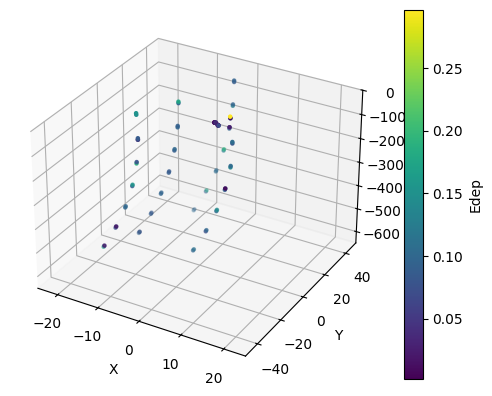

In [13]:
track_index = 6

x_vals = np.array(Tagger_SimHits_x[track_index])
y_vals = np.array(Tagger_SimHits_y[track_index])
z_vals = np.array(Tagger_SimHits_z[track_index])
edep_vals = np.array(Tagger_SimHits_Edep[track_index])
track_ID = np.array(Tagger_SimHits_trackID[track_index])

print(len(x_vals))

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot with color mapping based on weights
scatter = ax.scatter(x_vals, y_vals, z_vals, c=edep_vals, cmap='viridis', s=5)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Edep')

# Set axis labels
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')

# Specify axis limits individually
x_limits = (-25, 25)  # Set your desired limits for x-axis
y_limits = (-50, 50)  # Set your desired limits for y-axis
z_limits = (-650, 0)  # Set your desired limits for z-axis

ax.set_xlim(x_limits)
ax.set_ylim(y_limits)
ax.set_zlim(z_limits)





Text(0, 0.5, 'Number of Hits')

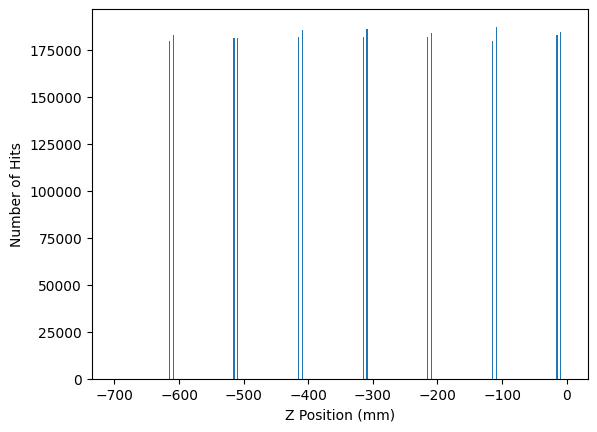

In [14]:
a,b,c =plt.hist(ak.flatten(Tagger_SimHits_z),bins=np.arange(-700,0,2))
plt.xlabel('Z Position (mm)') 
plt.ylabel('Number of Hits')

(-650.0, 0.0)

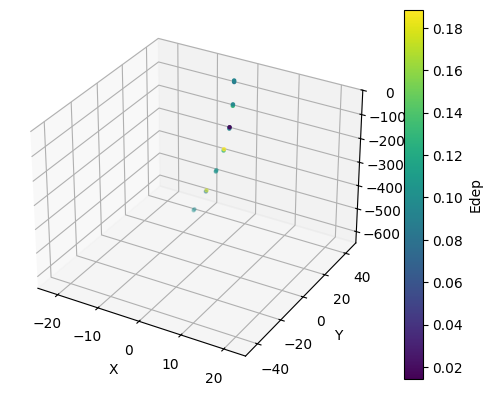

In [16]:
# pick out 1 track using track ID

x_vals = np.array(Tagger_SimHits_x[track_index])[track_ID.flatten() == 2]
y_vals = np.array(Tagger_SimHits_y[track_index])[track_ID.flatten() == 2]
z_vals = np.array(Tagger_SimHits_z[track_index])[track_ID.flatten() == 2]
edep_vals = np.array(Tagger_SimHits_Edep[track_index])[track_ID.flatten() == 2]


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot with color mapping based on weights
scatter = ax.scatter(x_vals, y_vals, z_vals, c=edep_vals, cmap='viridis', s=5)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Edep')

# Set axis labels
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')



ax.set_xlim(x_limits)
ax.set_ylim(y_limits)
ax.set_zlim(z_limits)



# Tagger Digi Collection

In [18]:
track_index = 6

x_vals = np.array(Tagger_Digi_x[track_index])
y_vals = np.array(Tagger_Digi_y[track_index])
z_vals = np.array(Tagger_Digi_z[track_index])
edep_vals = np.array(Tagger_Digi_Edep[track_index])
track_ID = np.array(Tagger_Digi_trackID[track_index])

len(x_vals)

57

(-50.0, 50.0)

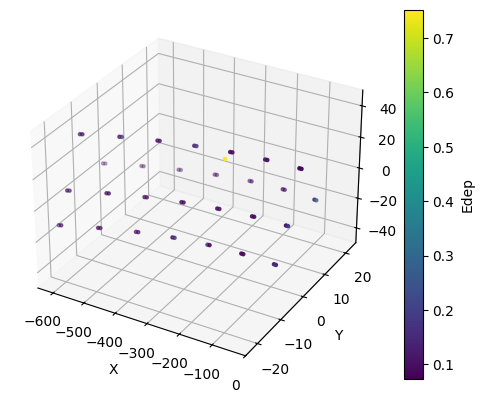

In [19]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot with color mapping based on weights
scatter = ax.scatter(x_vals, y_vals, z_vals, c=edep_vals, cmap='viridis', s=5)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Edep')

# Set axis labels
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')

# Specify axis limits individually
x_limits = (-650, 0)  # Set your desired limits for x-axis
y_limits = (-25, 25)  # Set your desired limits for y-axis
z_limits = (-50, 50)   # Set your desired limits for z-axis



ax.set_xlim(x_limits)
ax.set_ylim(y_limits)
ax.set_zlim(z_limits)





Text(0, 0.5, 'Number of Hits')

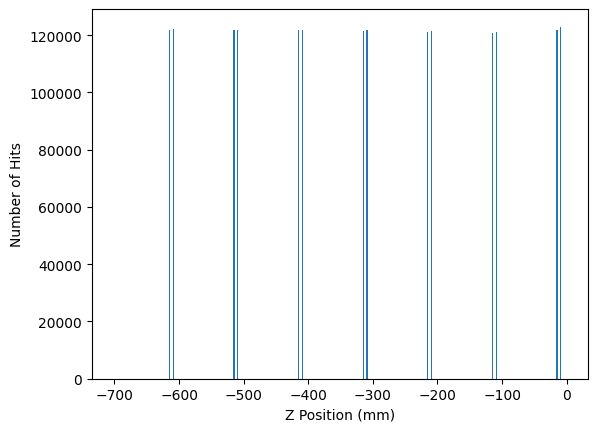

In [20]:
a,b,c =plt.hist(ak.flatten(Tagger_Digi_x),bins=np.arange(-700,0,2))
plt.xlabel('Z Position (mm)') 
plt.ylabel('Number of Hits')

(-50.0, 50.0)

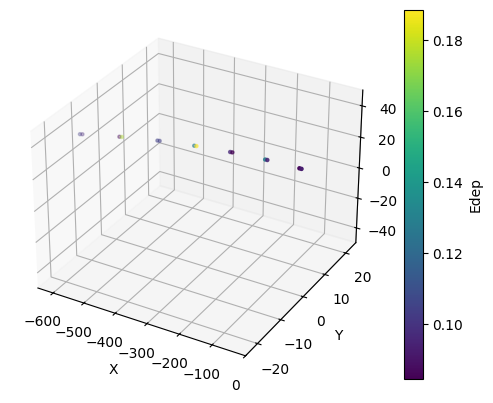

In [21]:
# pick out 1 track using track ID

x_vals = np.array(Tagger_Digi_x[track_index])[track_ID.flatten() == 2]
y_vals = np.array(Tagger_Digi_y[track_index])[track_ID.flatten() == 2]
z_vals = np.array(Tagger_Digi_z[track_index])[track_ID.flatten() == 2]
edep_vals = np.array(Tagger_Digi_Edep[track_index])[track_ID.flatten() == 2]


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot with color mapping based on weights
scatter = ax.scatter(x_vals, y_vals, z_vals, c=edep_vals, cmap='viridis', s=5)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Edep')

# Set axis labels
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')


ax.set_xlim(x_limits)
ax.set_ylim(y_limits)
ax.set_zlim(z_limits)






# Recoil Tracker SimHit Collection

In [22]:
track_index = 0

x_vals = np.array(Recoil_SimHits_x[track_index])
y_vals = np.array(Recoil_SimHits_y[track_index])
z_vals = np.array(Recoil_SimHits_z[track_index])
edep_vals = np.array(Recoil_SimHits_Edep[track_index])
track_ID = np.array(Recoil_SimHits_trackID[track_index])

len(x_vals)

59

(0.0, 200.0)

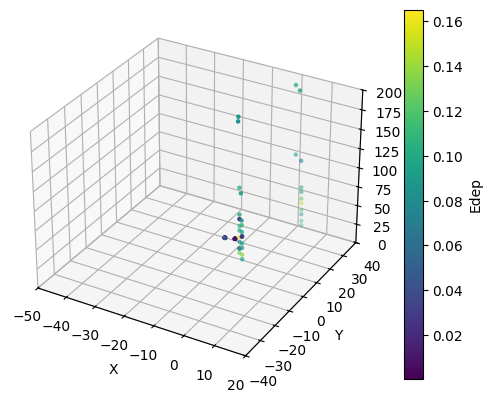

In [23]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot with color mapping based on weights
scatter = ax.scatter(x_vals, y_vals, z_vals, c=edep_vals, cmap='viridis', s=5)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Edep')

# Set axis labels
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')

# Specify axis limits individually
x_limits = (-50, 20)  # Set your desired limits for x-axis
y_limits = (-40, 40)  # Set your desired limits for y-axis
z_limits = (0, 200)  # Set your desired limits for z-axis

ax.set_xlim(x_limits)
ax.set_ylim(y_limits)
ax.set_zlim(z_limits)





Text(0, 0.5, 'Number of Hits')

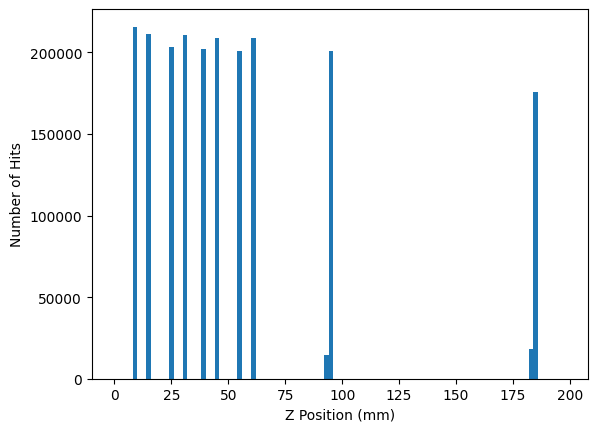

In [25]:
a,b,c =plt.hist(ak.flatten(Recoil_SimHits_z),bins=np.arange(0,200,2))
plt.xlabel('Z Position (mm)') 
plt.ylabel('Number of Hits')

# Recoil Digi Collection

In [26]:

x_vals = np.array(Recoil_Digi_x[track_index])
y_vals = np.array(Recoil_Digi_y[track_index])
z_vals = np.array(Recoil_Digi_z[track_index])
edep_vals = np.array(Recoil_Digi_Edep[track_index])
track_ID = np.array(Recoil_Digi_trackID[track_index])

len(x_vals)

33

(-20.0, 20.0)

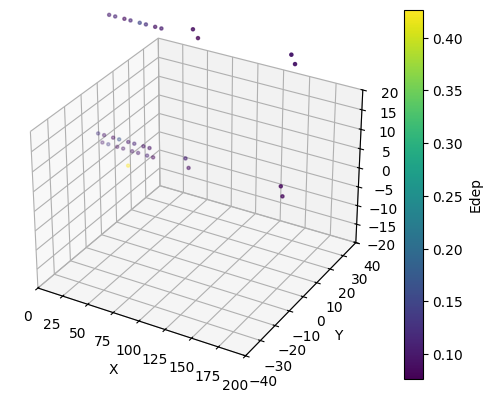

In [27]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot with color mapping based on weights
scatter = ax.scatter(x_vals, y_vals, z_vals, c=edep_vals, cmap='viridis', s=5)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Edep')

# Set axis labels
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')

# Specify axis limits individually
x_limits = (0, 200)  # Set your desired limits for x-axis
y_limits = (-40, 40)  # Set your desired limits for y-axis
z_limits = (-20, 20)   # Set your desired limits for z-axis

ax.set_xlim(x_limits)
ax.set_ylim(y_limits)
ax.set_zlim(z_limits)





Text(0, 0.5, 'Number of Hits')

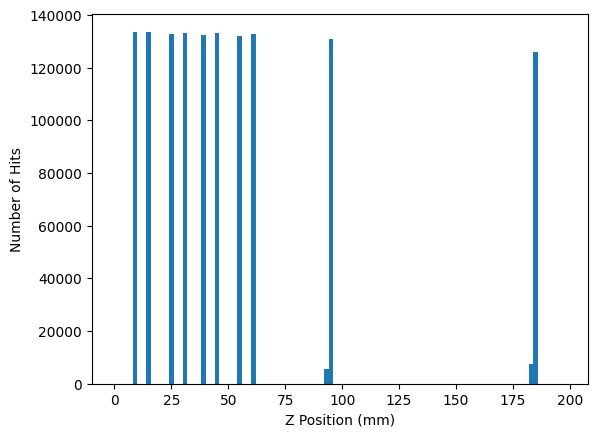

In [29]:
a,b,c =plt.hist(ak.flatten(Recoil_Digi_x),bins=np.arange(0,200,2))
plt.xlabel('Z Position (mm)') 
plt.ylabel('Number of Hits')

(-20.0, 20.0)

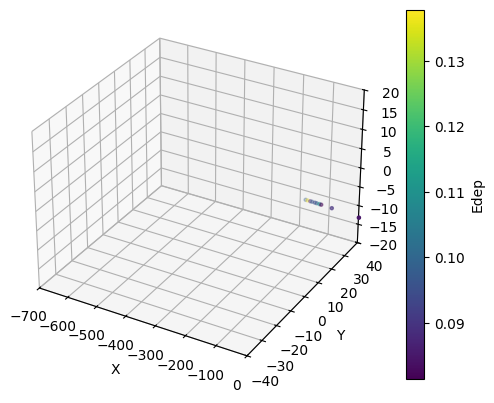

In [30]:
# pick out 1 track using track ID

x_vals = np.array(Recoil_Digi_x[track_index])[track_ID.flatten() == 2]
y_vals = np.array(Recoil_Digi_y[track_index])[track_ID.flatten() == 2]
z_vals = np.array(Recoil_Digi_z[track_index])[track_ID.flatten() == 2]
edep_vals = np.array(Recoil_Digi_Edep[track_index])[track_ID.flatten() == 2]


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot with color mapping based on weights
scatter = ax.scatter(x_vals, y_vals, z_vals, c=edep_vals, cmap='viridis', s=5)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Edep')

# Set axis labels
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')

# Specify axis limits individually
x_limits = (-700, 0)  # Set your desired limits for x-axis
y_limits = (-40, 40)  # Set your desired limits for y-axis
z_limits = (-20, 20)   # Set your desired limits for z-axis

ax.set_xlim(x_limits)
ax.set_ylim(y_limits)
ax.set_zlim(z_limits)




